# PHYS 295 Lab 6 Code
I will use this code to get the linear graph needed for the Lab 6 assignment.

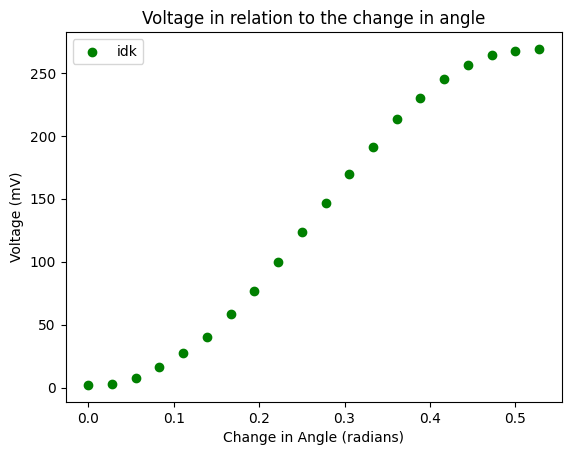

In [29]:
from matplotlib import pyplot as plt 
from scipy import stats
from scipy.optimize import curve_fit 
import numpy as np  
import csv
import pandas as pd

def load_data(filename):
    mylist = []
    with open(filename) as numbers:
        numbers_data = csv.reader(numbers, delimiter=",")
        next(numbers_data) #skip the header
        for row in numbers_data:
            mylist.append(row)
        return mylist

def sort_data(datalist, ind):
    column1 = []
    column2 = []
    for i in range(len(datalist)):
        row = datalist[i]
        if ind == 1:
            delta_angle = (140 - int(row[0]))/180
            column1.append(delta_angle)
        else:
            column1.append(float(row[0]))
        column2.append(float(row[1]))
    return column1, column2

a = load_data("PHYS 295 Lab 6 (Faraday Effect Pt1).csv")
volts1 = np.array(sort_data(a, 1))
plt.figure()
plt.scatter(volts1[0], volts1[1], marker='o', label='idk', color="green") 
plt.title("Voltage in relation to the change in angle") 
plt.xlabel('Change in Angle (radians)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

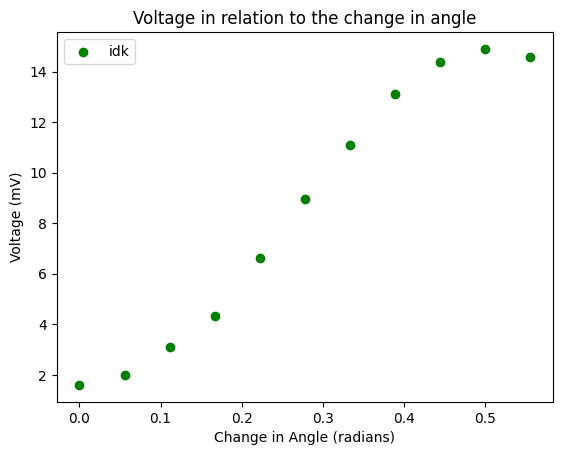

In [30]:
b = load_data("PHYS 295 Lab 6 (Faraday Effect Pt2).csv")
volts2 = np.array(sort_data(b, 1))
plt.figure()
#plt.plot(xdata, fit_y, '-', label='Gaussian Fit', color="red")
plt.scatter(volts2[0], volts2[1], marker='o', label='idk', color="green") 
plt.title("Voltage in relation to the change in angle") 
plt.xlabel('Change in Angle (radians)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

## Linearization of Malus Law

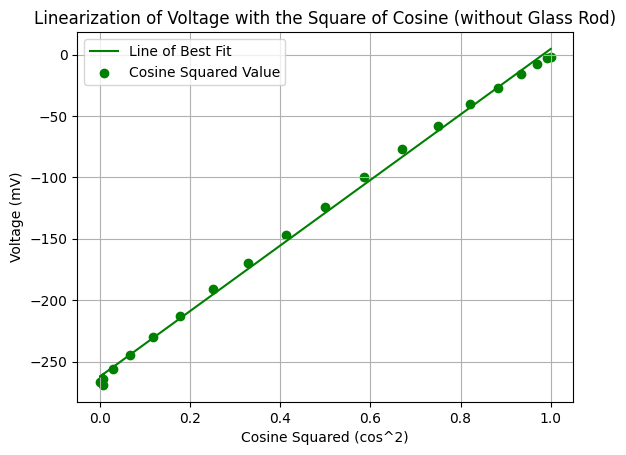

In [31]:
cos_squared = []; radians = []
for i in volts1[0]:
    rad = i * np.pi
    cos = (np.cos(rad))**2
    radians.append(rad); cos_squared.append(cos)

x_val = np.array(cos_squared)
x_ax, y_ax = np.polyfit(cos_squared, -volts1[1], 1)
plt.figure()
plt.plot(x_val, x_ax*x_val+y_ax, label="Line of Best Fit", color="green") #add line of best fit to plot
plt.scatter(cos_squared, -volts1[1], marker='o', label='Cosine Squared Value', color="green") 
plt.title("Linearization of Voltage with the Square of Cosine (without Glass Rod)") 
plt.xlabel('Cosine Squared (cos^2)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid()
plt.show()

In [32]:
stat_1= stats.linregress(x_val, -volts1[1])
print(stat_1)
print("The slope of the linearization is equal to V0")
print(f"The value of the slope is equal to {round(stat_1[0], 2)} +- {round(stat_1[4], 2)}")

LinregressResult(slope=np.float64(266.86329354644903), intercept=np.float64(-262.2714207612516), rvalue=np.float64(0.9989507490738273), pvalue=np.float64(1.4582044614947328e-25), stderr=np.float64(2.88369443817514), intercept_stderr=np.float64(1.7362208747323815))
The slope of the linearization is equal to V0
The value of the slope is equal to 266.86 +- 2.88


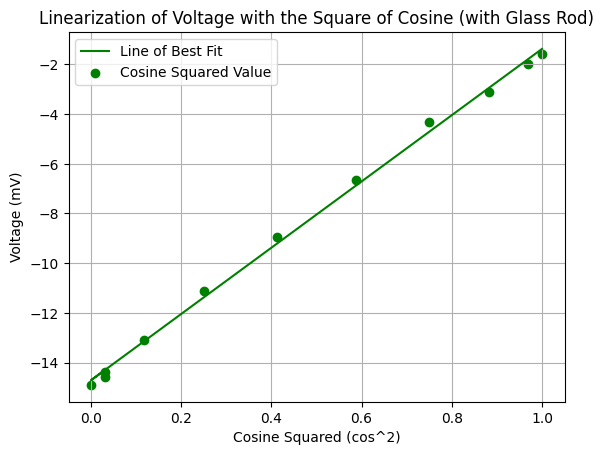

In [33]:
cos_squared = []; radians = []
for i in volts2[0]:
    rad = i * np.pi
    cos = (np.cos(rad))**2
    radians.append(rad); cos_squared.append(cos)

x_val = np.array(cos_squared)
x_ax, y_ax = np.polyfit(cos_squared, -volts2[1], 1)
plt.figure()
plt.plot(x_val, x_ax*x_val+y_ax, label="Line of Best Fit", color="green") #add line of best fit to plot
plt.scatter(cos_squared, -volts2[1], marker='o', label='Cosine Squared Value', color="green") 
plt.title("Linearization of Voltage with the Square of Cosine (with Glass Rod)") 
plt.xlabel('Cosine Squared (cos^2)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid()
plt.show()

In [34]:
stat_2= stats.linregress(x_val, -volts2[1])
#print(stat_1)
print("The slope of the linearization is equal to V0")
print(f"The value of the slope is equal to {round(stat_2[0], 2)} +- {round(stat_2[4], 2)}")

The slope of the linearization is equal to V0
The value of the slope is equal to 13.33 +- 0.21


## Calculation of the DC Verdet Constant (Method 1)

In [67]:
k = 11.1*(10**-3)
I1 = 3.25
B = k*I1
θ_DC = (4/180)*np.pi
L = 0.10
CV_DC = θ_DC/(B*L)
print(B)
print(f"DC) The value of the Verdet constant for this glass rod is {round(CV_DC, 2)} rad/T*m")

0.036075
DC) The value of the Verdet constant for this glass rod is 19.35 rad/T*m


## Calculation of the DC Verdet Constant (Method 2)

In [69]:
I2 = 3.2
B = k*I2
θ_DC = (3/180)*np.pi
L = 0.10
CV_DC = θ_DC/(B*L)
print(B)
print(f"DC) The value of the Verdet constant for this glass rod is {round(CV_DC, 2)} rad/T*m")

0.03552
DC) The value of the Verdet constant for this glass rod is 14.74 rad/T*m


## Calculation of the AC Faraday Effect/AC Verdet Constant

In [70]:
c = load_data("PHYS 295 Lab 6 (Faraday Effect Pt3).csv")
d = load_data("PHYS 295 Lab 6 (Faraday Effect Pt4).csv")
e = load_data("PHYS 295 Lab 6 (Faraday Effect Pt5).csv")

AC_data1 = sort_data(c, 0)
AC_data2 = sort_data(d, 0)
AC_data3 = sort_data(e, 0)
#true_v = [x*(10**-3) for x in AC_data1[0]]
truei1 = [x*(10**-3) for x in AC_data1[1]]; truei2 = [x*(10**-3) for x in AC_data2[1]]; truei3 = [x*(10**-3) for x in AC_data3[1]]
mean_i1 = round(np.mean(truei1[1]), 6); mean_i2 = round(np.mean(truei2[1]), 6); mean_i3 = round(np.mean(truei3[1]), 6)
mean_v1 = round(np.mean(AC_data1[0]), 3); mean_v2 = round(np.mean(AC_data2[0]), 2); mean_v3 = round(np.mean(AC_data3[0]), 2)
Vp1 = [x/2 for x in AC_data1[0]]; Vp2 = [x/2 for x in AC_data2[0]]; Vp3 = [x/2 for x in AC_data3[0]]; 
Vrms1 = [x/np.sqrt(2) for x in Vp1]; Vrms2 = [x/np.sqrt(2) for x in Vp2]; Vrms3 = [x/np.sqrt(2) for x in Vp3]
true_v1 = round(np.mean(Vrms1), 2); true_v2 = round(np.mean(Vrms2), 4); true_v3 = round(np.mean(Vrms3), 4)
error_1 = np.std(Vrms1); error_2 = np.std(Vrms2); error_3 = np.std(Vrms3)

V_0 = stat_2[0]
θ_AC1 = true_v2/V_0; θ_AC2 = true_v3/V_0
B1 = k*mean_i1; B2 = k*mean_i2; B3 = k*mean_i3
print(B2, B3)
CV_AC1 = θ_AC1/(B2*L); CV_AC2 = θ_AC2/(B3*L)
print(f"AC1) The value of the Verdet constant for this glass rod is {round(CV_AC1, 2)} rad/T*m")
print(f"AC2) The value of the Verdet constant for this glass rod is {round(CV_AC2, 2)} rad/T*m")

0.00221667 0.00220224
AC1) The value of the Verdet constant for this glass rod is 152.57 rad/T*m
AC2) The value of the Verdet constant for this glass rod is 150.02 rad/T*m


In [71]:
v_range = [mean_v1, mean_v2, mean_v3]
for i in range(1, 4):
    print(f"Step {i} has a change in voltage equal to {v_range[i-1]}")

Step 1 has a change in voltage equal to 3.605
Step 2 has a change in voltage equal to 1.28
Step 3 has a change in voltage equal to 1.25


In [72]:
print(f"AC1) The value of the Verdet constant for this glass rod is {round(CV_AC1/5, 2)} rad/T*m")
print(f"AC2) The value of the Verdet constant for this glass rod is {round(CV_AC2/5, 2)} rad/T*m")

AC1) The value of the Verdet constant for this glass rod is 30.51 rad/T*m
AC2) The value of the Verdet constant for this glass rod is 30.0 rad/T*m


### Random

In [53]:
table = {"Name": ["Step 1", "Step 2", "Step 3"],
         "V_rms": [true_v1, true_v2, true_v3],
         "Error": [error_1, error_2, error_3]
        }

show_table = pd.DataFrame(data=table)
show_table

,Name,V_rms,Error
0,Step 1,1.2700,0.075294
1,Step 2,0.4509,0.002850
2,Step 3,0.4405,0.002236
